In [ ]:
14from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from itertools import combinations
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = '/content/drive/MyDrive/machine learning file/IRIS (2).csv'
df = pd.read_csv(file_path)

In [ ]:
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
feature_names = df.columns[:-1]
target_names = label_encoder.classes_

In [ ]:
plot_colors = "ryb"
plot_step = 0.02
pairs = list(combinations(range(X.shape[1]), 2))

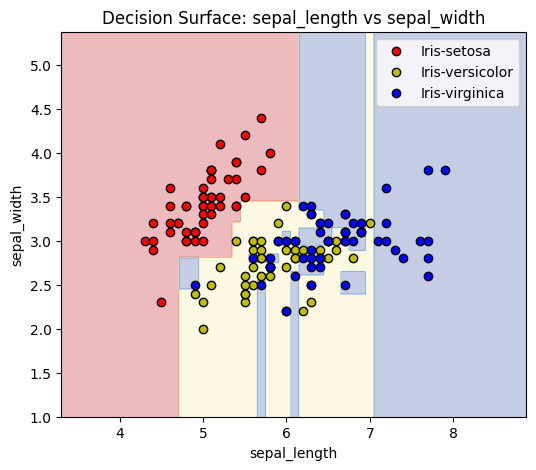

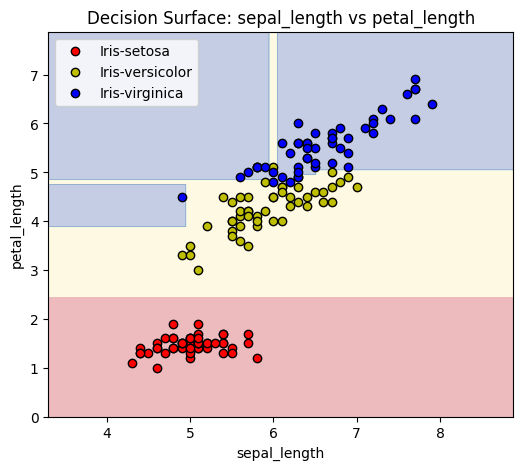

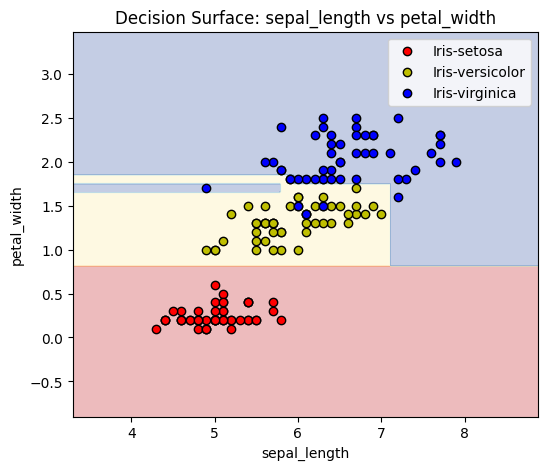

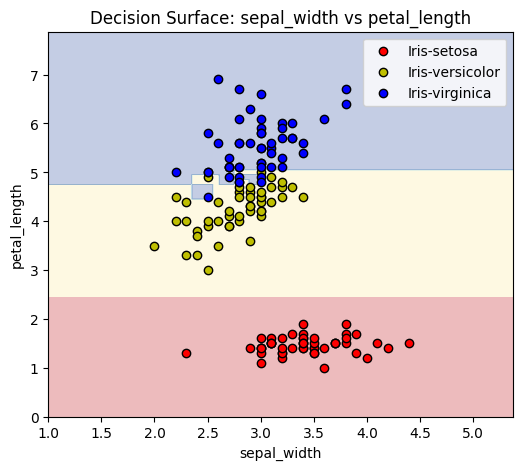

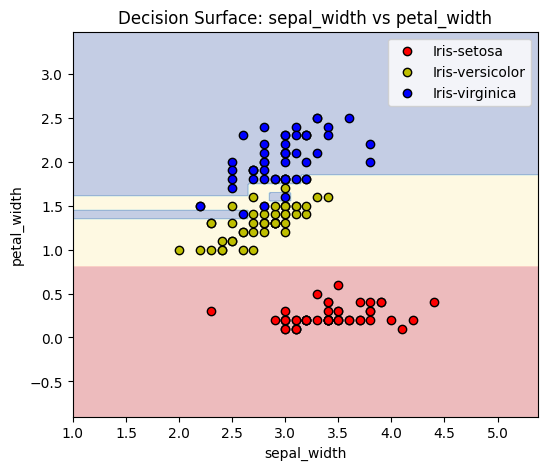

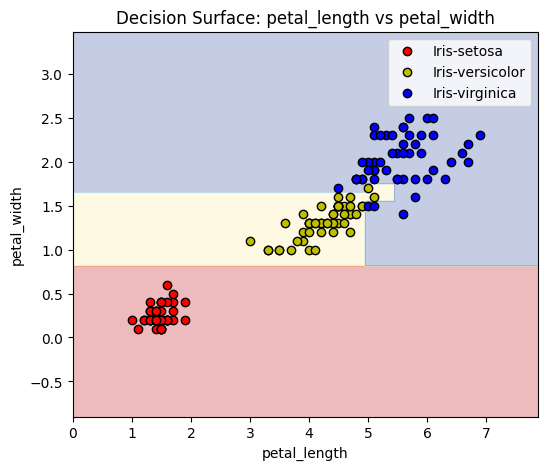

In [ ]:
for i, (x_idx, y_idx) in enumerate(pairs):
      X_pair = X[:, [x_idx, y_idx]]
      clf = DecisionTreeClassifier().fit(X_pair, y)
      x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
      y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(6, 5))
      plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
      for idx, color in zip(range(len(target_names)), plot_colors):
                plt.scatter(X_pair[y == idx, 0], X_pair[y == idx, 1],
                                    c=color, label=target_names[idx], edgecolor='k')
      plt.xlabel(feature_names[x_idx])
      plt.ylabel(feature_names[y_idx])
      plt.title(f"Decision Surface: {feature_names[x_idx]} vs {feature_names[y_idx]}")
      plt.legend()


In [ ]:
clf_all = DecisionTreeClassifier().fit(X, y)

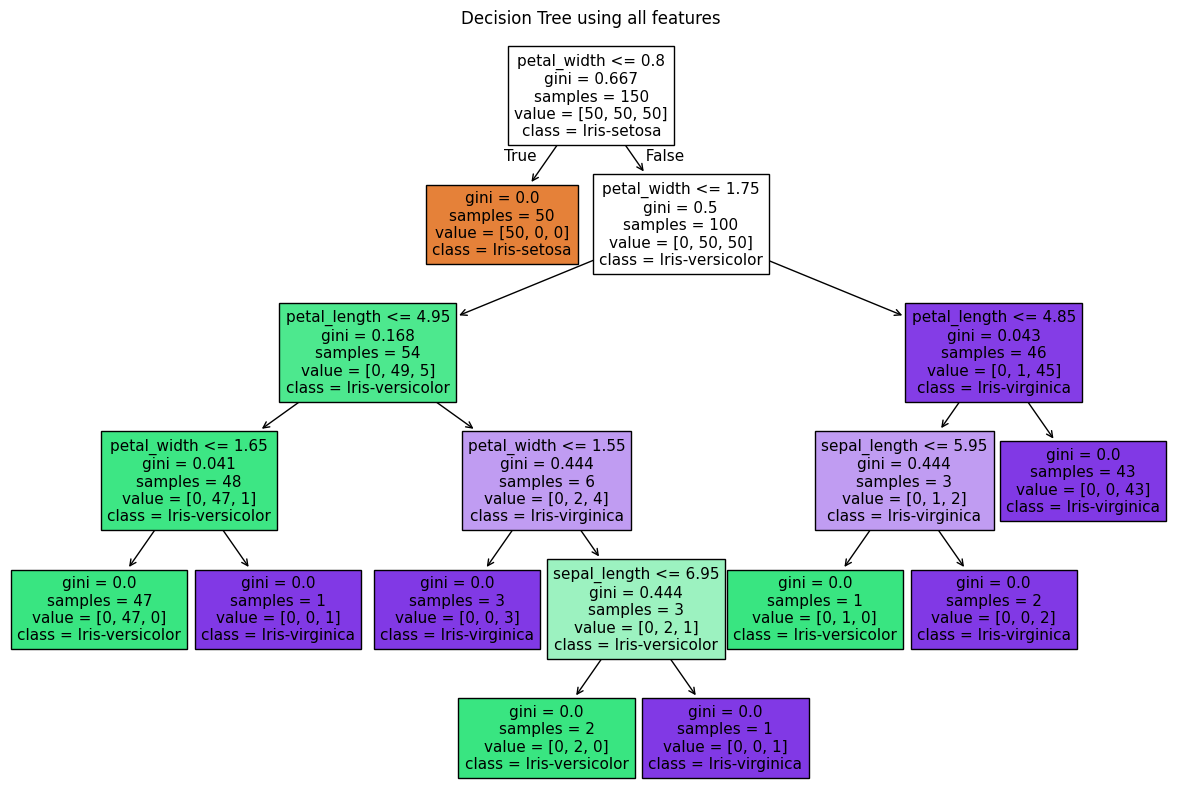

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_all, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree using all features")
plt.show()